In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import scipy.io as io

In [3]:
from PIL import Image
import zipfile
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
def read_directory(directory_name):
    array_of_img=[]
    for filename in os.listdir(r"./"+directory_name):
        img = io.loadmat(directory_name + "/" + filename)
        array_of_img.append(img)
    return array_of_img

In [5]:
def read_directory2(directory_name):
    array_of_img=[]
    for filename in os.listdir(r"./"+directory_name):
        img = tf.io.read_file(directory_name+"/"+filename)
        img=tf.image.decode_jpeg(img)
        array_of_img.append(img)
    return array_of_img

In [9]:
f=zipfile.ZipFile('./labels.zip','r')
for file in f.namelist():
    f.extract(file) #解压到的位置，./表示当前目录(与此.ipynb文件同一个目录)
f.close()

In [8]:
images=read_directory2('./labels.zip')

NotADirectoryError: [WinError 267] 目录名称无效。: '././labels.zip'

In [7]:
#将labels中的矩阵变为三通道
label=[]
for i in labels:
    label.append(tf.convert_to_tensor(np.dstack((i['S'],i['S'],i['S'])), dtype=tf.uint16))

In [8]:
image = np.expand_dims(labels[0]['S'], axis=2)
image = np.concatenate((image, image, image), axis=-1)

In [26]:
a=images[1]

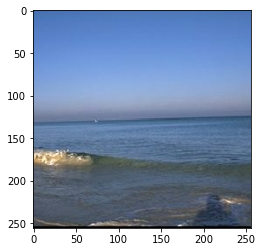

In [27]:
plt.imshow(a)

In [28]:
a=tf.convert_to_tensor(a)

In [39]:
tf.image.resize

SyntaxError: positional argument follows keyword argument (<ipython-input-39-05bbcb786d7b>, line 1)

In [35]:
b=tf.image.resize(a,[128,128])

In [34]:
tf.shape(a)[1].numpy()

256

In [63]:
b=np.array([a for i in range(3)]).transpose(1,2,0)

In [77]:
b/29

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.96551724, 0.96551724, 0.96551724],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.96551724, 0.96551724, 0.96551724],
        ...,
        [0.96551724, 0.96551724, 0.96551724],
        [0.96551724, 0.96551724, 0.96551724],
        [0.96551724, 0.96551724, 0.96551724]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.96551724, 0.96551724, 0.96551724],
        ...,
        [0.96551724, 0.96551724, 0.96551724],
        [0.96551724, 0.96551724, 0.96551724],
        [0.96551724, 0.96551724, 0.96551724]],

       ...,

       [[0.86206897, 0.86206897, 0.86206897],
        [0.86206897, 0.86206897, 0.86206897],
        [0.86206897, 0

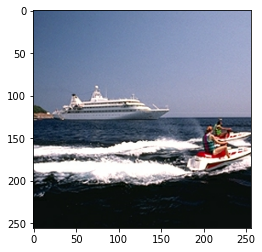

In [76]:
plt.imshow(images[0]/255)

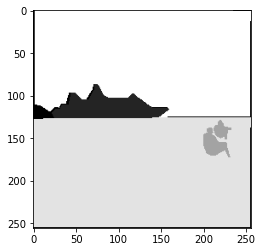

In [85]:
plt.imshow(b/28)

In [37]:
from PIL import Image


In [39]:
b=Image.fromarray(a)

In [42]:
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY) # 再将后者由三通道转换为单通道
list_ = ((gray == src_1).astype("int8")).tolist() # 转为列表，方便计算比对结果中 0(False) 的个数
print(list_.count(0))


error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x7962abde::Set<1,-1,-1>,struct cv::impl::A0x7962abde::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [217]:
label[0]

<tf.Tensor: shape=(256, 256, 3), dtype=uint16, numpy=
array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       ...,

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [ 0,  0,  0]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint16)>

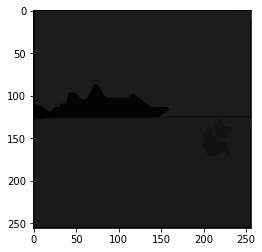

In [218]:
plt.imshow(label[0])

In [122]:
img_width=256
img_height=256
def random_crop(input_image,real_image):
    stacked_image=tf.stack([input_image,real_image],axis=0)
    cropped_image=tf.random.random_crop(stacked_image,size=[2,img_height,img_height,3])
    return cropped_image[0],cropped_image[1]

In [177]:
one = np.ones((3, 3))
two = np.ones((3, 3))
thr = np.dstack((one, two,one))
print(thr.shape)


(3, 3, 3)


In [182]:
tf.convert_to_tensor(np.dstack((labels[0]['S'],labels[0]['S'],labels[0]['S'])))

<tf.Tensor: shape=(256, 256, 3), dtype=uint16, numpy=
array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [28, 28, 28],
        ...,
        [28, 28, 28],
        [28, 28, 28],
        [28, 28, 28]],

       ...,

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [ 0,  0,  0]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [25, 25, 25],
        [25, 25, 25],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint16)>

In [226]:
_URL = 'https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/facades.tar.gz'

path_to_zip = tf.keras.utils.get_file('facades.tar.gz',
                                      origin=_URL,
                                      extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'facades/')


30171136/30168306 [==============================] - 373s 12us/step


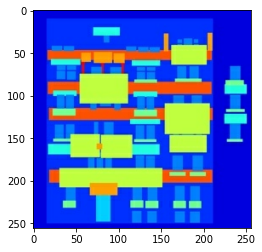

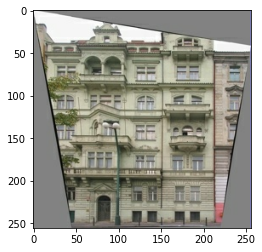

In [227]:
def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)

    w = tf.shape(image)[1]

    w = w // 2
    real_image = image[:, :w, :]
    input_image = image[:, w:, :]

    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image

inp, re = load(PATH+'train/100.jpg')
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)


In [24]:
#定义下采样
def down_sample(filters,size,apply_batchnorm=True):
    initializer=tf.random_normal_initializer(0,0.02)
    block=tf.keras.Sequential()
    block.add(tf.keras.layers.Conv2D(filters,size,strides=2,padding='same',kernel_initializer=initializer,use_bias=False))
    if apply_batchnorm:
        block.add(tf.keras.layers.BatchNormalization())
    block.add(tf.keras.layers.LeakyReLU())
    return block

In [25]:
#定义上采样
def up_sample(filters,size,apply_dropout=False):
    initializer=tf.random_normal_initializer(0,0.02)
    block=tf.keras.Sequential()
    block.add(tf.keras.layers.Conv2DTranspose(filters,size,strides=2,padding='same',kernel_initializer=initializer,use_bias=False))
    block.add(tf.keras.layers.BatchNormalization())
    if apply_dropout:
        block.add(tf.keras.layers.Dropout(0.5))
    block.add(tf.keras.layers.ReLU())
    return block

In [26]:
def Generator():
    inputs=tf.keras.layers.Input(shape=[256,256,3])
    initializer=tf.random_normal_initializer(0,0.02)
    last=tf.keras.layers.Conv2DTranspose(3,4,strides=2,padding='same',kernel_initializer=initializer,activation='tanh')
    down_stack=[
        down_sample(64,4,apply_batchnorm=False),
        down_sample(128,4),
        down_sample(256,4),
        down_sample(512,4),
        down_sample(512,4),
        down_sample(512,4),
        down_sample(512,4),
        down_sample(512,4),
    ]
    
    up_stack=[
        up_sample(512,4,apply_dropout=True),
        up_sample(512,4,apply_dropout=True),
        up_sample(512,4,apply_dropout=True),
        up_sample(512,4),
        up_sample(256,4),
        up_sample(128,4),
        up_sample(64,4),
    ]
    
    x=inputs
    skips=[]
    for down in down_stack:
        x=down(x)
        skips.append(x)
    skips=reversed(skips[:-1])
    for up,skip in zip(up_stack,skips):
        x=up(x)
        x=tf.keras.layers.concatenate([x,skip])
    x=last(x)
    return tf.keras.Model(inputs=inputs,outputs=x)

In [29]:
def Discriminator():
    initializer=tf.random_normal_initializer(0,0.02)
    inputs=tf.keras.layers.Input(shape=(256,256,3))
    target=tf.keras.layers.Input(shape=(256,256,3))
    
    x=tf.keras.layers.concatenate([inputs,target])
    
    x=down_sample(64,4,False)(x)
    x=down_sample(128,4)(x)
    x=down_sample(256,4)(x)
    
    zero_padding=tf.keras.layers.ZeroPadding2D()(x)
    conv=tf.keras.layers.Conv2D(512,4,kernel_initializer=initializer,use_bias=False)(zero_padding)
    batchnorm=tf.keras.layers.BatchNormalization()(conv)
    leaky_relu=tf.keras.layers.LeakyReLU()(batchnorm)
    
    zero_padding2=tf.keras.layers.ZeroPadding2D()(leaky_relu)
    
    last=tf.keras.layers.Conv2D(1,4,strides=1,kernel_initializer=initializer,use_bias=False)(zero_padding2)
    
    return tf.keras.Model(inputs=[inputs,target],outputs=last)

In [31]:
lam=100
object_loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(dis_gen_output,gen_output,target):
    gan_loss=object_loss(tf.ones_like(dis_gen_output),dis_gen_output)
    
    l1_loss=tf.reduce_mean(tf.abs(target-gen_output))
    
    gen_loss=gan_loss+lam*l1_loss
    return gen_loss,gan_loss,l1_loss

In [32]:
def discriminator_loss(dis_real_output,dis_gen_output):
    real_loss=object_loss(tf.ones_like(dis_real_output),dis_real_output)
    gen_loss=object_loss(tf.zeros_like(dis_gen_output),dis_gen_output)
    
    dis_loss=real_loss+gen_loss
    return dis_loss

In [229]:
from tensorflow.keras.models import load_model

In [236]:
gen=load_model('Gen_model.h5',compile=False)

In [237]:
gen.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sequential_48 (Sequential)      (None, 128, 128, 64) 3072        input_4[0][0]                    
__________________________________________________________________________________________________
sequential_49 (Sequential)      (None, 64, 64, 128)  131584      sequential_48[0][0]              
__________________________________________________________________________________________________
sequential_50 (Sequential)      (None, 32, 32, 256)  525312      sequential_49[0][0]              
_______________________________________________________________________________________